## Relax Data Science challenge ##

### Load User Engagement Data ##

In [20]:
# Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
#read the user engagement data
df_usr_eng = pd.read_csv('./takehome_user_engagement.csv')
df_usr_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df_usr_eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [4]:
df_usr_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
# Unique user id
print('Total Unique user id visited are {}'.format(df_usr_eng.user_id.nunique()))

Total Unique user id visited are 8823


In [19]:
df_usr_eng['time_stamp'] = pd.to_datetime(df_usr_eng['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [22]:
def login_ct_7day (df, days=7, login=3):
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    elapsed_time = df['date'].diff(periods=login-1)
    return any(elapsed_time <= timedelta(days=days))

df_usr_eng_by_usr = df_usr_eng.groupby(['user_id']).apply(login_ct_7day)
df_usr_eng_by_usr

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Length: 8823, dtype: bool

### Load User Data ###

In [51]:
df_usr = pd.read_csv('./takehome_users.csv', encoding = "ISO-8859-1")
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [52]:
df_usr['creation_time'] = pd.to_datetime(df_usr['creation_time'], format='%Y-%m-%d %H:%M:%S')
df_usr['last_session_creation_time'] = pd.to_datetime(df_usr['last_session_creation_time'], unit='s')
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [53]:
max_time = max(df_usr['creation_time'])
df_usr['usr_account_age'] = (max_time - df_usr['creation_time']).dt.days
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usr_account_age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,38
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,196
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,437
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,374
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,498


In [54]:
df_usr['usr_account_usage'] = (df_usr['last_session_creation_time'] - df_usr['creation_time']).dt.days
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usr_account_age,usr_account_usage
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,38,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,196,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,437,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,374,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,498,5.0


In [55]:
# Making a copy of user dataframe with column which will be useful for analysis and building model
df_usr_mod = df_usr.copy()
df_usr_mod.drop(['creation_time','name','email','last_session_creation_time'],axis=1,inplace=True)

In [57]:
df_usr_mod

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usr_account_age,usr_account_usage
0,1,GUEST_INVITE,1,0,11,10803.0,38,0.0
1,2,ORG_INVITE,0,0,1,316.0,196,136.0
2,3,ORG_INVITE,0,0,94,1525.0,437,0.0
3,4,GUEST_INVITE,0,0,1,5151.0,374,1.0
4,5,GUEST_INVITE,0,0,193,5240.0,498,5.0
...,...,...,...,...,...,...,...,...
11995,11996,ORG_INVITE,0,0,89,8263.0,266,0.0
11996,11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,505,5.0
11997,11998,GUEST_INVITE,1,1,83,8074.0,33,0.0
11998,11999,PERSONAL_PROJECTS,0,0,6,NaN,729,2.0


In [58]:
df_usr_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [59]:
df_usr_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          6417 non-null   float64
 6   usr_account_age             12000 non-null  int64  
 7   usr_account_usage           8823 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 750.1+ KB


In [60]:
df_usr[df_usr['usr_account_usage'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usr_account_age,usr_account_usage
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,303,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,206,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0,43,NaN
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN,318,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN,473,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,248,NaN,156,NaN
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaT,1,0,29,NaN,37,NaN
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,74,NaN,326,NaN
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,281,NaN,428,NaN


There are some records where there is no last session creation time is not available

In [76]:
df_usr_eng_by_usr.name = 'adopted_usr'
df_usr_eng_by_usr=pd.DataFrame(df_usr_eng_by_usr)
df_usr_eng_by_usr.reset_index(drop=False,inplace=True)
unique_adopted_users = df_usr_eng_by_usr[df_usr_eng_by_usr['adopted_usr']==True].user_id.unique()
unique_users = df_usr_eng_by_usr.user_id.unique()

In [77]:
print ('Total Unique User : {}'.format(len(unique_users)))
print ('Total Unique Adopted User : {}'.format(len(unique_adopted_users)))

Total Unique User : 8823
Total Unique Adopted User : 1656


In [79]:
df_usr_mod['adopted_usr'] = df_usr_mod.object_id.isin(unique_adopted_users)
df_usr_mod

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,usr_account_age,usr_account_usage,adopted_usr
0,1,GUEST_INVITE,1,0,11,10803.0,38,0.0,False
1,2,ORG_INVITE,0,0,1,316.0,196,136.0,True
2,3,ORG_INVITE,0,0,94,1525.0,437,0.0,False
3,4,GUEST_INVITE,0,0,1,5151.0,374,1.0,False
4,5,GUEST_INVITE,0,0,193,5240.0,498,5.0,False
...,...,...,...,...,...,...,...,...,...
11995,11996,ORG_INVITE,0,0,89,8263.0,266,0.0,False
11996,11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,505,5.0,False
11997,11998,GUEST_INVITE,1,1,83,8074.0,33,0.0,False
11998,11999,PERSONAL_PROJECTS,0,0,6,NaN,729,2.0,False


In [80]:
df_usr_mod[['object_id','adopted_usr']].groupby('adopted_usr').count()

,object_id
adopted_usr,
False,10344
True,1656


In [83]:
df_usr_mod.adopted_usr = df_usr_mod.adopted_usr.astype(int)
df_usr_mod[['object_id','adopted_usr']].groupby('adopted_usr').count()

,object_id
adopted_usr,
0,10344
1,1656


### Data Analysis and Visualization ###

#### Analysis by creation source ####

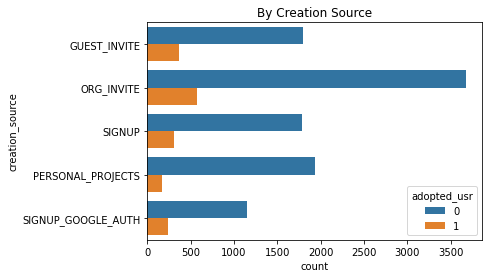

In [86]:
sns.countplot(y="creation_source", hue='adopted_usr', data=df_usr_mod).set_title('By Creation Source')
plt.show()

Maximum invitation by Org Invite

#### Analysis by Opted to Mailing List ####

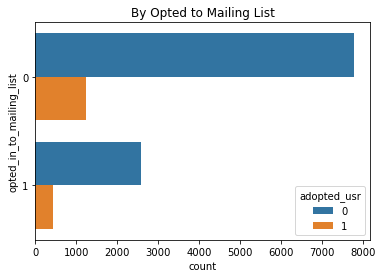

In [88]:
sns.countplot(y="opted_in_to_mailing_list", hue='adopted_usr', data=df_usr_mod).set_title('By Opted to Mailing List')
plt.show()

Adoption is slightly more for users who did not opted to mailing list

#### Analysis by Marketing Drip ####

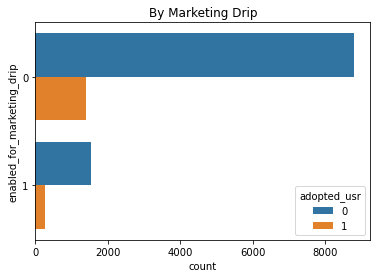

In [89]:
sns.countplot(y="enabled_for_marketing_drip", hue='adopted_usr', data=df_usr_mod).set_title('By Marketing Drip')
plt.show()

Adoption is slightly more for users who are not enabled for marketing drip

#### Analysis to see if Account Usage has influence in Adoption ####

C:\Users\deept\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\deept\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


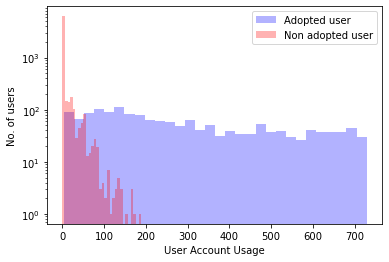

In [95]:
plt.hist(df_usr_mod.loc[df_usr_mod['adopted_usr']==1, 'usr_account_usage'], bins=30, alpha=0.3, color='b', label='Adopted user')
plt.hist(df_usr_mod.loc[df_usr_mod['adopted_usr']==0, 'usr_account_usage'], bins=30, alpha=0.3, color='r', label='Non adopted user')
plt.yscale('log')
plt.legend()
plt.xlabel("User Account Usage")
plt.ylabel('No. of users')
plt.show()

Users who have been using the account for longer time adopted the product

#### Analysis to see if Account Usage has influence in Adoption ####

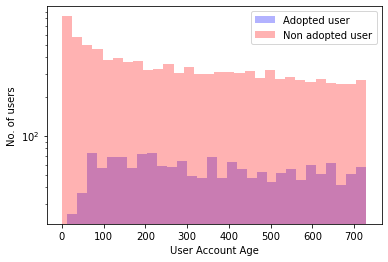

In [96]:
plt.hist(df_usr_mod.loc[df_usr_mod['adopted_usr']==1, 'usr_account_age'], bins=30, alpha=0.3, color='b', label='Adopted user')
plt.hist(df_usr_mod.loc[df_usr_mod['adopted_usr']==0, 'usr_account_age'], bins=30, alpha=0.3, color='r', label='Non adopted user')
plt.yscale('log')
plt.legend()
plt.xlabel("User Account Age")
plt.ylabel('No. of users')
plt.show()

Adoption rate is lower where account just got opened after that it picks up and stays flat